### Dhruv Joshi and Ahmed Kamal

Fall 2019

CS343: Neural Networks

Project 1: Single layer networks (extensions)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
net = Adaline()

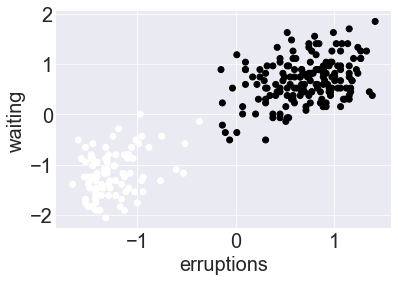

In [76]:
df = pd.read_csv('data/old_faithful.csv')
data = df.to_numpy()

severe = data[:, 3]
data = data[:, 1:3]

data[:,0]= (data[:,0]-data[:,0].mean())/data[:,0].std()
data[:,1]= (data[:,1]-data[:,1].mean())/data[:,1].std()

plt.scatter(data[:,0], data[:, 1], c=severe)
plt.xlabel("erruptions")
plt.ylabel("waiting")
plt.show()

# --------------- Extension 1 --------------------

I set up the ability for a user to set a higher lr, a lrrate that would be a multiplier that the lr would be multiplied by every epoch, and a minimum lr below which the lr should not go. Using this, I set up a dynamic learning rate for the ADALINE model

In [115]:
net = Adaline(1000, lr=0.004, lr_rate=0.99, lr_min=0.0001)
loss, acc = net.fit(data, severe)
print(f'At the end of training, your loss is {loss[-1]:.2f} and accuracy is {acc[-1]:.2f}')

TypeError: __init__() got an unexpected keyword argument 'lr_rate'

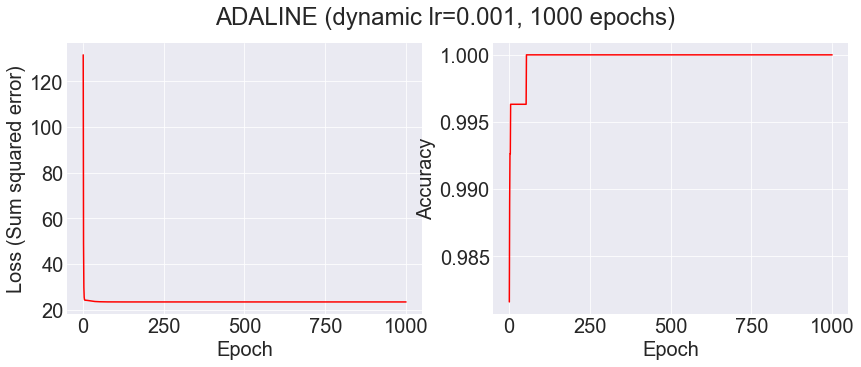

In [116]:
def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = net.get_num_epochs()
    lr = net.get_learning_rate()
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE (dynamic lr={lr}, {n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()
plot_adaline_train(net, loss, acc)

In [117]:
print(net.wts)

[0.279 0.704 0.229]


y = -3.07627146568764x + -1.2207959082285127


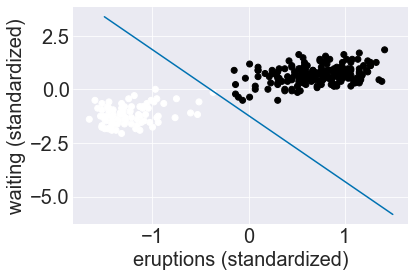

In [118]:
wts = net.get_wts()
m = -wts[1]/wts[2]
b = -wts[0]/wts[2]
print(f"y = {m}x + {b}")

# lower and upper bounds for x values of decision curve when plotting in normalized coordinates
low, high = -1.5, 1.5

# Generate 50 equally spaced x-values that we will plug into the equation for the decision boundary curve
# to get the corresponding y-value on the curve
x_i = np.linspace(low, high)
# TODO: Compute y_i here
y_i = (m*x_i)+b

plt.scatter(data[:, 0], data[:, 1], c=severe)
plt.plot(x_i, y_i)
plt.xlabel('eruptions (standardized)')
plt.ylabel('waiting (standardized)')
plt.show()

# ------------- Extension 2 ------------------

I implemented a regularization rate that would be incorporated into the model's loss function by adding the summation of the values of the weights multiplied by the regularization rate. This causes the model to change its preferences to weights based on the regularization rate. 

In [119]:
net = Adaline(1000, regularization_rate = 10)
loss, acc = net.fit(data, severe)
print(f'At the end of training, your loss is {loss[-1]:.2f} and accuracy is {acc[-1]:.2f}')

At the end of training, your loss is 23.48 and accuracy is 1.00


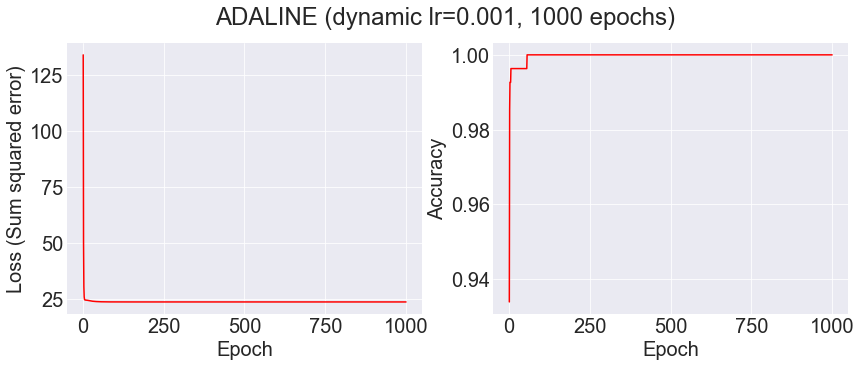

[0.279 0.704 0.229]


In [120]:
def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = net.get_num_epochs()
    lr = net.get_learning_rate()
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE (dynamic lr={lr}, {n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()
plot_adaline_train(net, loss, acc)
print(net.wts)

In [121]:
print(net.wts)

[0.279 0.704 0.229]


y = -3.076271465687377x + -1.2207959082284339


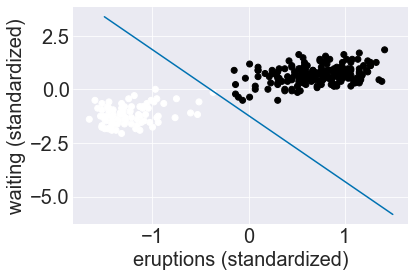

In [122]:
wts = net.get_wts()
m = -wts[1]/wts[2]
b = -wts[0]/wts[2]
print(f"y = {m}x + {b}")

# lower and upper bounds for x values of decision curve when plotting in normalized coordinates
low, high = -1.5, 1.5

# Generate 50 equally spaced x-values that we will plug into the equation for the decision boundary curve
# to get the corresponding y-value on the curve
x_i = np.linspace(low, high)
# TODO: Compute y_i here
y_i = (m*x_i)+b

plt.scatter(data[:, 0], data[:, 1], c=severe)
plt.plot(x_i, y_i)
plt.xlabel('eruptions (standardized)')
plt.ylabel('waiting (standardized)')
plt.show()

# --------------- Extension 3 ---------------
Implementing loss proportional learning rates
Here, we set the learning rate by which the model works for the first iteration, then loss is computed, if the loss is more than 1000, the same learning rate is used, other wise, the maximum of 0.001 and lr*loss/1000 is used. Hence, if the loss is more than 1000, the same learning rate is used, otherwise, a fraction of it is used, this fraction is capped at 0.001.

In [142]:
net = Adaline(1000, regularization_rate = 10, lr=0.01, loss_based_lr=True)
loss, acc = net.fit(data, severe)
print(f'At the end of training, your loss is {loss[-1]:.2f} and accuracy is {acc[-1]:.2f}')

At the end of training, your loss is 23.48 and accuracy is 1.00


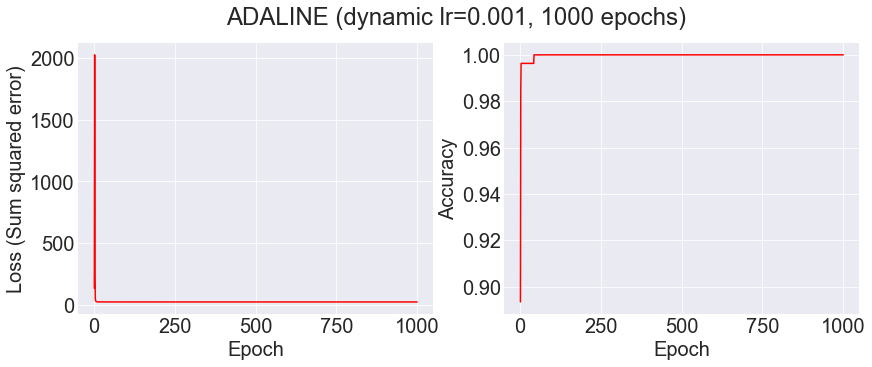

[0.279 0.704 0.229]


In [143]:
def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = net.get_num_epochs()
    lr = net.get_learning_rate()
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE (dynamic lr={lr}, {n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()
plot_adaline_train(net, loss, acc)
print(net.wts)

In [144]:
print(net.wts)

[0.279 0.704 0.229]


y = -3.0762714656890537x + -1.2207959082289364


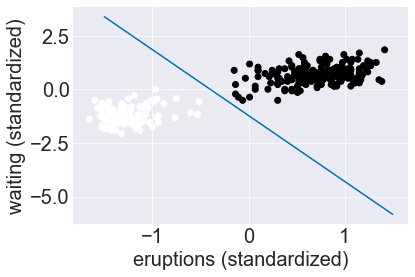

In [145]:
wts = net.get_wts()
m = -wts[1]/wts[2]
b = -wts[0]/wts[2]
print(f"y = {m}x + {b}")

# lower and upper bounds for x values of decision curve when plotting in normalized coordinates
low, high = -1.5, 1.5

# Generate 50 equally spaced x-values that we will plug into the equation for the decision boundary curve
# to get the corresponding y-value on the curve
x_i = np.linspace(low, high)
# TODO: Compute y_i here
y_i = (m*x_i)+b

plt.scatter(data[:, 0], data[:, 1], c=severe)
plt.plot(x_i, y_i)
plt.xlabel('eruptions (standardized)')
plt.ylabel('waiting (standardized)')
plt.show()